In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [2]:
train_dir = r"C:\Users\Lenovo\Desktop\Thesis\main folder\dataset\New folder\train/"
test_dir = r"C:\Users\Lenovo\Desktop\Thesis\main folder\dataset\New folder\test/"

In [3]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 996 images belonging to 2 classes.
Found 684 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [5]:
model.compile(optimizer = 'adam', loss = "hinge", metrics = ['accuracy'])

In [6]:
# model.add(Dense(number_of_classes,kernel_regularizers = l2(0.01),activation= "softmax"))
# model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])

In [7]:
history = model.fit(x = training_set, validation_data = test_set, epochs=5)

Epoch 1/5
32/32 [==============================] - 909s 28s/step - loss: 0.8449 - accuracy: 0.6165 - val_loss: 0.9423 - val_accuracy: 0.5380
Epoch 2/5
32/32 [==============================] - 932s 29s/step - loss: 0.5585 - accuracy: 0.7359 - val_loss: 0.7721 - val_accuracy: 0.6491
Epoch 3/5
32/32 [==============================] - 928s 29s/step - loss: 0.4852 - accuracy: 0.7721 - val_loss: 0.8626 - val_accuracy: 0.5731
Epoch 4/5
32/32 [==============================] - 889s 28s/step - loss: 0.4392 - accuracy: 0.7831 - val_loss: 0.8305 - val_accuracy: 0.6257
Epoch 5/5
32/32 [==============================] - 905s 28s/step - loss: 0.3854 - accuracy: 0.8042 - val_loss: 0.8837 - val_accuracy: 0.6067


No handles with labels found to put in legend.


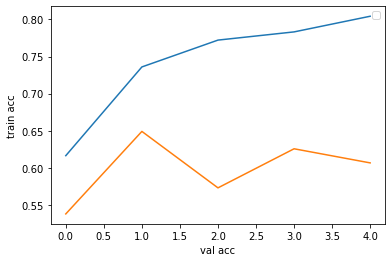

<Figure size 432x288 with 0 Axes>

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('train acc')
plt.xlabel('val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

No handles with labels found to put in legend.


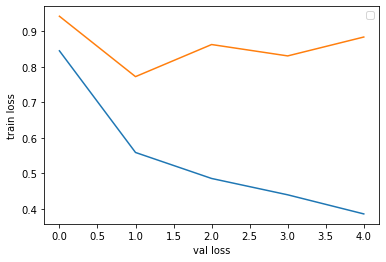

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('train loss')
plt.xlabel('val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = model.predict_generator(test_set , steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys()) 
import sklearn
# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_set.classes, predicted_classes))

report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Instructions for updating:
Please use Model.predict, which supports generators.
['clean', 'dirty']
[[289  45]
 [306  44]]
              precision    recall  f1-score   support

       clean       0.49      0.87      0.62       334
       dirty       0.49      0.13      0.20       350

    accuracy                           0.49       684
   macro avg       0.49      0.50      0.41       684
weighted avg       0.49      0.49      0.41       684

